<a href="https://colab.research.google.com/github/nazarcoder123/Telecom_cus_churn_prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # To read the file
import numpy as np   # To perform Array Multiplication & to perform mathematical operation
import seaborn as sns  # For Advance visulization
import matplotlib.pyplot as plt  # For visulization

from sklearn.model_selection import train_test_split  # To split the data into x & y  axis
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder  # To convert String into numeric form
from sklearn.preprocessing import StandardScaler  # # It help in standized the data to mean = 0 & std = 1
from sklearn.preprocessing import MinMaxScaler  # To Bring the data into -1 & +1 format
from sklearn.feature_selection import SelectKBest # To select the best features
from sklearn.preprocessing import PowerTransformer # PowerTransformer is a data preprocessing technique
from sklearn.compose import ColumnTransformer #  It is used for data preprocessing and transformation of different subsets of columns in a dataset
from sklearn.pipeline import Pipeline,make_pipeline # make_pipeline is a convenience function in scikit-learn that simplifies the creation of a machine learning pipeline
from sklearn.metrics import accuracy_score  # To check the accuracy of the model
from sklearn.model_selection import GridSearchCV # To find the best tuning
from sklearn.decomposition import PCA # To Take best feature we use pca(Principal Component Analysis)
from sklearn.model_selection import cross_val_score # evaluating a model on each subset, and returning the evaluation scores
from sklearn.linear_model  import LogisticRegression # Logistic Regression is a statistical model used for binary classification in ML
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier is a algorithm of ML used for binary classification in ML
from sklearn.svm import SVC # SVC stands for Support Vector Classifier, which is a machine learning algorithm used for classification tasks
from sklearn.neighbors import KNeighborsClassifier #  Is a machine learning algorithm used for classification tasks
from sklearn.naive_bayes import BernoulliNB # Is a ml algorithm for classification task
from sklearn.linear_model import Perceptron # It is a single type of artifical neural network used for binary classification task
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is a machine learning algorithm used for classification tasks
from sklearn.ensemble import VotingClassifier #  machine learning technique in which multiple models, such as classifiers or regressors, are combined to make predictions
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier is a machine learning ensemble method, specifically used for classification tasks.
from sklearn.ensemble import BaggingClassifier #  The BaggingClassifier is an ensemble machine learning technique that combines multiple base classifiers

# ANN(ARTIFICAL NEURAL NETWORK)
import tensorflow  # This library is import for Deep Learning
import tensorflow as tf # This library is import for Deep Learning
from tensorflow import keras # keras is a deep learning frame work
from tensorflow.keras import Sequential # Sequential typically refers to a type of neural network architecture used in deep learning
from tensorflow.keras.layers import Dense #  "dense" refers to a type of layer commonly used in deep learning models

## Data Preprocessing

In [2]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx") # To Read a Excel

In [3]:
df.head() # To check the top 5 rows along with column's

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.isnull().sum() # To check the null values

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
print(df['Location'].unique())
print("The total numbers of state's is:",df['Location'].nunique())

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
The total numbers of state's is: 5


In [6]:
df.describe() # To know the flow of the table

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.info() # To know the data types of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
df.corr() # To knoe the correlation of the table

<ipython-input-8-33dd5de5cc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # To knoe the correlation of the table


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [9]:
df = df.drop(columns=["CustomerID", "Name","Location"]) # removing the unnecessary column's

In [10]:
df = pd.get_dummies(data=df, columns=["Gender"], drop_first=True) # In this we are performing OneHotEncoder to convert "string" variable into "int"

## Let's perform EDA

<Axes: xlabel='Subscription_Length_Months', ylabel='Monthly_Bill'>

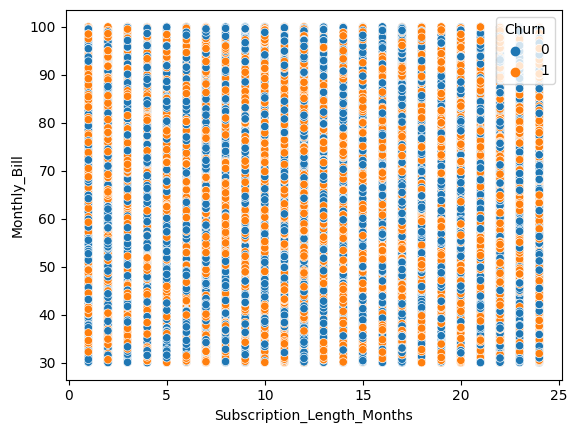

In [14]:
sns.scatterplot(x = df['Subscription_Length_Months'],y = df['Monthly_Bill'],hue = df['Churn'])

(array([11237.,  9426.,  9517.,  9341.,  9498., 11204.,  9540.,  9518.,
         9470., 11249.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

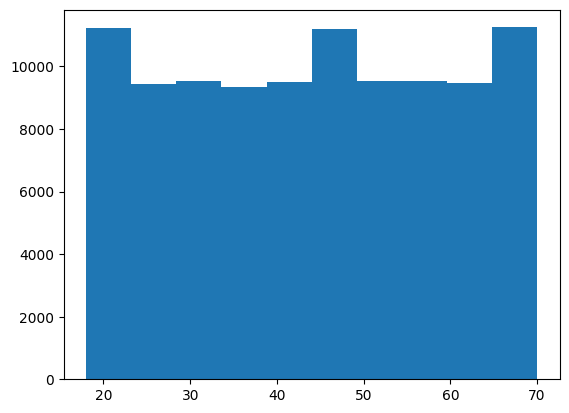

In [15]:
plt.hist(x = df['Age'])

<Axes: >

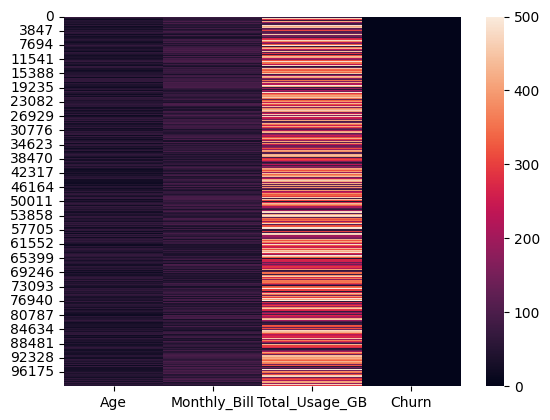

In [16]:
sns.heatmap(df[["Age","Monthly_Bill","Total_Usage_GB","Churn"]])

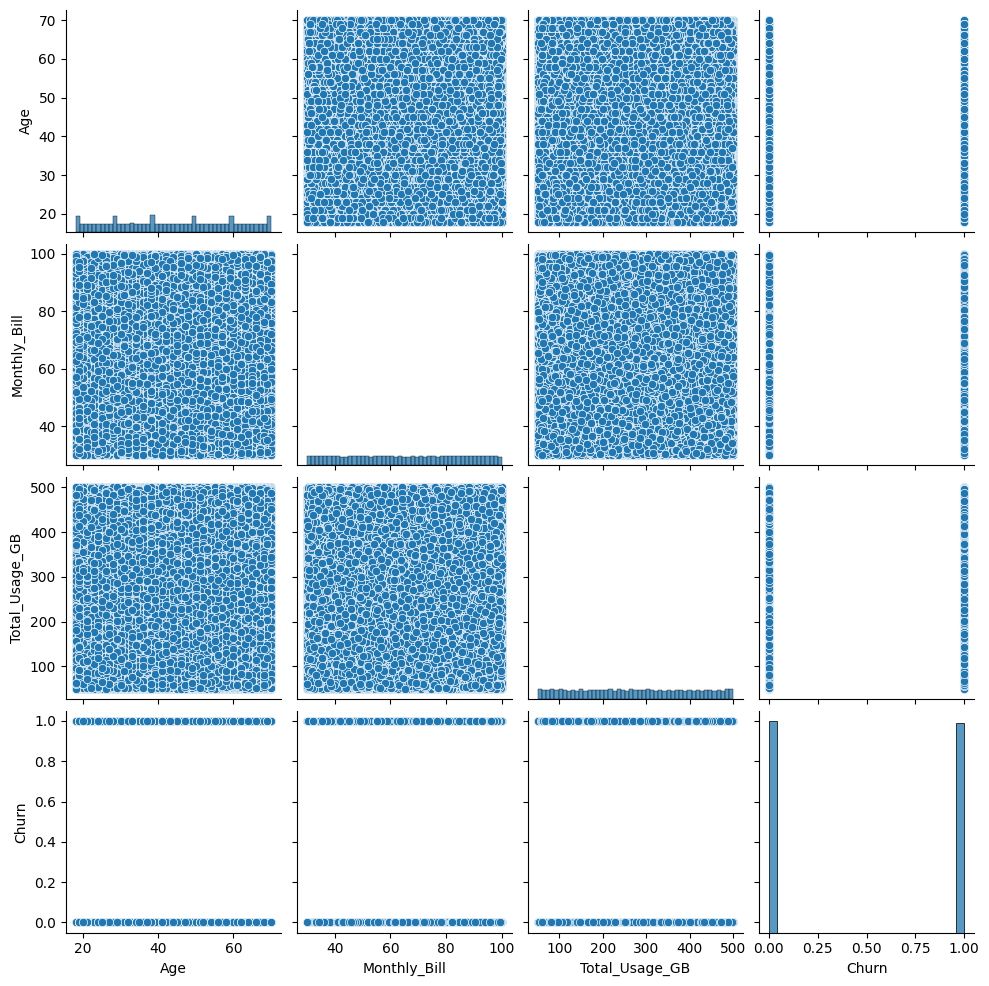

In [17]:
sns.pairplot(df[["Age","Monthly_Bill","Total_Usage_GB","Churn"]])

## Now lets check the outliers in the data

<Axes: >

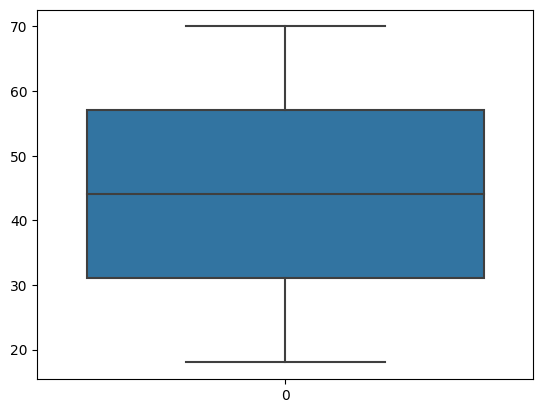

In [18]:
sns.boxplot(df['Age'])

<Axes: >

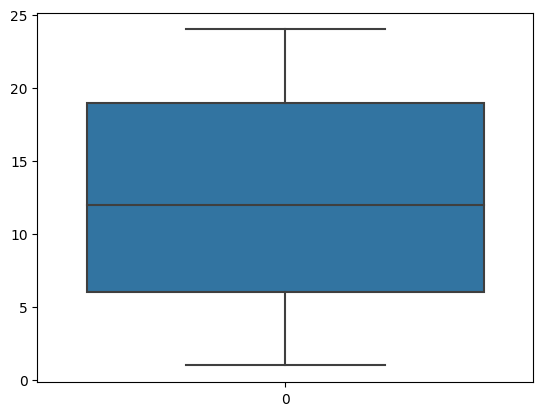

In [19]:
sns.boxplot(df['Subscription_Length_Months'])

<Axes: >

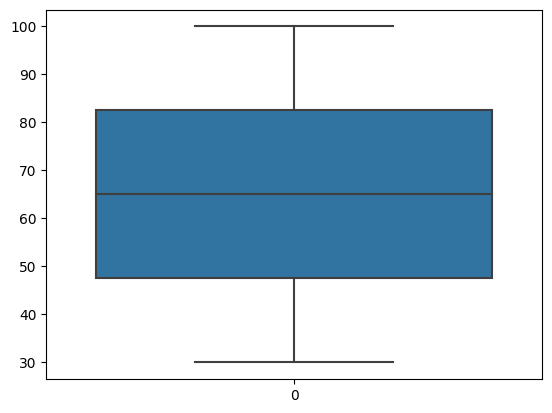

In [20]:
sns.boxplot(df['Monthly_Bill'])

<Axes: >

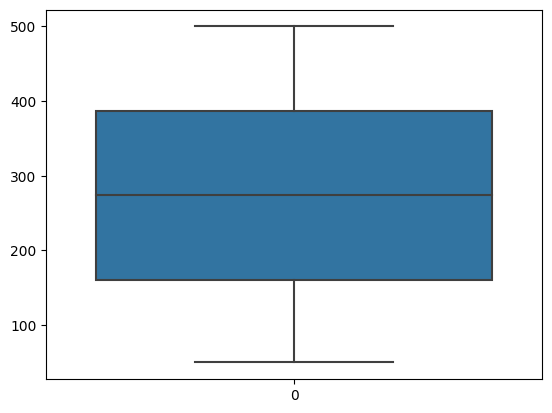

In [21]:
sns.boxplot(df['Total_Usage_GB'])

## From the above diagram we can see there is no outliers in the data

## Now lets check the flow of the data

<ipython-input-22-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

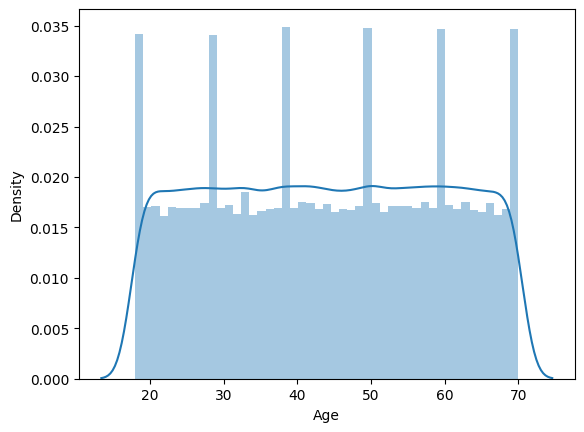

In [22]:
sns.distplot(df["Age"])

<ipython-input-23-572ef6adf359>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Subscription_Length_Months"])


<Axes: xlabel='Subscription_Length_Months', ylabel='Density'>

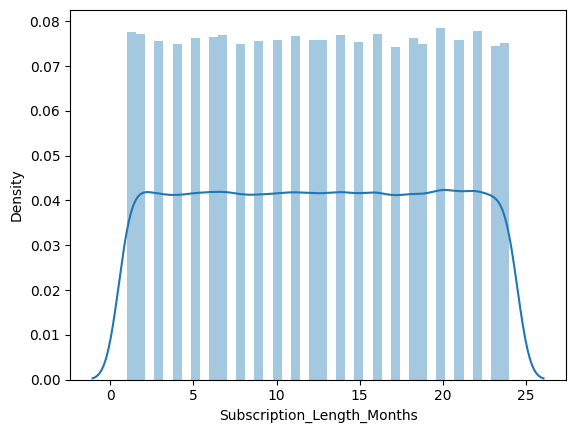

In [23]:
sns.distplot(df["Subscription_Length_Months"])

<ipython-input-24-a68ce0dfb60f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly_Bill"])


<Axes: xlabel='Monthly_Bill', ylabel='Density'>

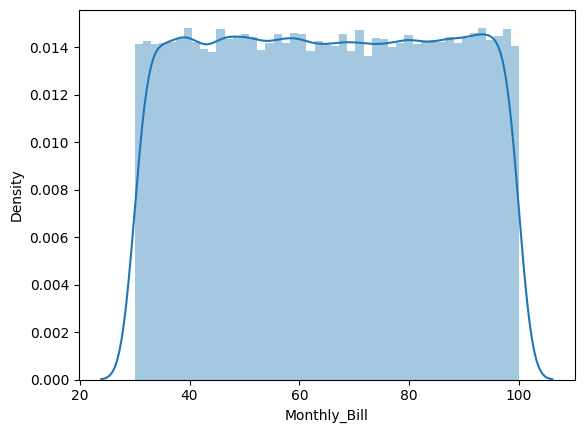

In [24]:
sns.distplot(df["Monthly_Bill"])

<ipython-input-25-bf2edad2b725>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total_Usage_GB"])


<Axes: xlabel='Total_Usage_GB', ylabel='Density'>

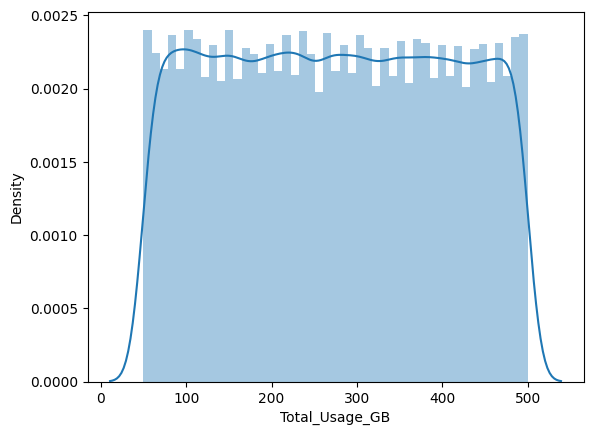

In [25]:
sns.distplot(df["Total_Usage_GB"])

## From the above diagram we can clearly see that the data is normally distributed

## Now let's divide the data into train_test_split

In [26]:
x = df.drop(columns="Churn")  # Independent columns
y = df.iloc[:,-1]   # Dependent columns

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42) # spliting the data into x & y

In [28]:
print(x_train.shape)
print(y_test.shape)

(80000, 5)
(20000,)


In [30]:
sc = StandardScaler()  # To bring the data in between 0 & 1

In [31]:
x_train_sc = sc.fit_transform(x_train)  # scaling the values between 0 & 1 train data
x_test_sc = sc.transform(x_test) # scaling the values between 0 & 1 for test data

## There is no need for function transformation as your data is normally distributed

## Now Let's Apply Power Transformer (yeo Johnson Transform)

In [32]:
pt = PowerTransformer()  # This is power transformer to enrich the data in more understanding able manner

In [33]:
x_train_pt = pt.fit_transform(x_train_sc)
x_test_pt = pt.transform(x_test_sc)

## There is no need for Feature construction so
## Let's move to Feature Extraction or Feature Selection(using PCA)

In [34]:
pca = PCA(n_components=0.95) # Principle Components Analysis (to extract the important features and select imprtant feature)

In [35]:
x_train_pca = pca.fit_transform(x_train_pt)
x_test_pca = pca.transform(x_test_pt)

## Now Till here we had performed lot's of Feature Engineering work we had In Rich the data in a lot in Feature Engineering prospectively

## Now let's start Performing Model Building/Machine Learning Task

## First Lets Begin with LogisticRegression Machine Learning Algorithm

In [36]:
lr = LogisticRegression()
lr.fit(x_train_pca,y_train)
y_pred = lr.predict(x_test_pca)

In [37]:
print("The Accuracy_Score of LogisticRegression is:",accuracy_score(y_pred,y_test))
print("The cross_val_score of LogisticRegression is:",cross_val_score(lr,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of LogisticRegression is: 1.0
The cross_val_score of LogisticRegression is: 1.0


## In this model we are using KNeighboursClassifiers as machine learning algorithm

In [38]:
kn = KNeighborsClassifier()
kn.fit(x_train_pca,y_train)
y_pred1 = kn.predict(x_test_pca)

In [39]:
print("The Accuracy_Score of KNeighboursClassifier is:",accuracy_score(y_pred1,y_test))
print("The cross_val_score of KNeighboursClassifier is:",cross_val_score(kn,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of KNeighboursClassifier is: 1.0
The cross_val_score of KNeighboursClassifier is: 1.0


## In this we are using RandomForestClassifier algorithm

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train_pca,y_train)
y_pred2 = rf.predict(x_test_pca)

In [41]:
print("The Accuracy_Score of RandomForestClassifier is:",accuracy_score(y_pred2,y_test))
print("The cross_val_score of RandomForestClassifer is:",cross_val_score(rf,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of RandomForestClassifier is: 1.0
The cross_val_score of RandomForestClassifer is: 1.0


## In this we are using SVM algoritm

In [42]:
sv = SVC(probability=True)
sv.fit(x_train_pca,y_train)
y_predd = sv.predict(x_test_pca)

In [43]:
print("The Accuracy_Score of SVM is:",accuracy_score(y_predd,y_test))
print("The cross_val_score of SVM is:",cross_val_score(sv,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of SVM is: 1.0
The cross_val_score of SVM is: 1.0


## In this we are using perceptron algorithm

In [44]:
p = Perceptron()
p.fit(x_train_pca,y_train)
yy = p.predict(x_test_pca)

In [45]:
print("The Accuracy_Score of Perceptron is:",accuracy_score(yy,y_test))
print("The cross_val_score of Perceptron is:",cross_val_score(p,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of Perceptron is: 1.0
The cross_val_score of Perceptron is: 1.0


## In this we are using Naive Bayes Machine Learing Algorithm

In [46]:
br = BernoulliNB()
br.fit(x_train_pca,y_train)
y_pred_bern = br.predict(x_test_pca)

In [47]:
print("The Accuracy_Score of Bernoullic is:",accuracy_score(y_pred_bern,y_test))
print("The cross_val_score of Bernoullic is:",cross_val_score(br,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of Bernoullic is: 0.9315
The cross_val_score of Bernoullic is: 0.9298375


## Now lets perform DecisionTreeClassifer Machine Learning Algorithm


In [48]:
dt = DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)
y_pred_tree = dt.predict(x_test_pca)

In [49]:
print("The Accuracy_Score of DecisionTreeClassifier is:",accuracy_score(y_pred_tree,y_test))
print("The cross_val_score of DecisionTreeClassifier is:",cross_val_score(dt,x_train_pca,y_train,cv=5).mean())

The Accuracy_Score of DecisionTreeClassifier is: 0.99955
The cross_val_score of DecisionTreeClassifier is: 0.9996499999999999


## Now let's perform the ensemble learning methods of Machine Learning.

## Let's Began with the most popular BoostingClassifier(ensemble)

In [50]:
ada = AdaBoostClassifier(n_estimators=1,learning_rate=1.0)
ada.fit(x_train_pca,y_train)
y_pred_ada = ada.predict(x_test_pca)

In [51]:
print("The AccuracyScore of AdaBoostClassifier is:",accuracy_score(y_pred_ada,y_test))
print("The Cross_Val_Score of AdaBoostClassifier is:",cross_val_score(ada,x_train_pca,y_train,cv=5).mean())

The AccuracyScore of AdaBoostClassifier is: 0.92945
The Cross_Val_Score of AdaBoostClassifier is: 0.929975


## Now lets perform BaggingClassifier(ensemble)

In [52]:
bag = BaggingClassifier(n_estimators=50,estimator=SVC())
bag.fit(x_train_pca,y_train)
y_pred_bag = bag.predict(x_test_pca)

In [53]:
print("The AccuracyScore of BaggingClassifier is:",accuracy_score(y_pred_bag,y_test))
print("The Cross_Val_Score of BaggingClassifier is:",cross_val_score(bag,x_train_pca,y_train,cv=5).mean())

The AccuracyScore of BaggingClassifier is: 1.0
The Cross_Val_Score of BaggingClassifier is: 1.0


## Now lets perform VotingClassifier(ensemble) In this we will take take all algorithm prediction and give the output.

In [54]:
cf1 = LogisticRegression()
cf2 = RandomForestClassifier()
cf3 = SVC(probability=True)

In [55]:
estimators = [("lr",cf1),("rf",cf2),("sv",cf3)]

In [56]:
vc = VotingClassifier(estimators=estimators,voting="soft")
vc.fit(x_train_pca,y_train)
y_pred_vc = vc.predict(x_test_pca)

In [57]:
print("The Accuracy_score of VotingClassifier is:",accuracy_score(y_pred_vc,y_test))
print("The cross_val_score of VotingClassifier is:",cross_val_score(vc,x_train_pca,y_train,cv=5).mean())

The Accuracy_score of VotingClassifier is: 1.0
The cross_val_score of VotingClassifier is: 1.0


## NOW LET'S PREDICT WITH DEEP LEARNING MODEL(ANN)

## Now lets Build a ANN (Artificial Neural Networks) Model

In [58]:
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=5))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 50)                6450      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,519
Trainable params: 8,519
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [68]:
history = model.fit(x_train_pca,y_train,epochs=10,batch_size=1000,validation_split=0.2)

Epoch 1/10
64/64 [==============================] - 2s 28ms/step - loss: 1.6361e-09 - accuracy: 1.0000 - val_loss: 1.6347e-09 - val_accuracy: 1.0000
Epoch 2/10
64/64 [==============================] - 1s 22ms/step - loss: 1.6365e-09 - accuracy: 1.0000 - val_loss: 1.6351e-09 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 1s 17ms/step - loss: 1.6369e-09 - accuracy: 1.0000 - val_loss: 1.6355e-09 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 1s 18ms/step - loss: 1.6373e-09 - accuracy: 1.0000 - val_loss: 1.6359e-09 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 1s 15ms/step - loss: 1.6377e-09 - accuracy: 1.0000 - val_loss: 1.6363e-09 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 1s 14ms/step - loss: 1.6381e-09 - accuracy: 1.0000 - val_loss: 1.6367e-09 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 1s 14ms/step - loss: 1.6385e-09 - accuracy: 1.0000 - v

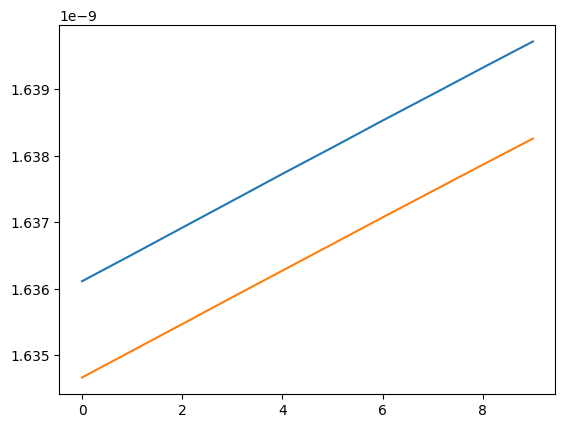

In [69]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

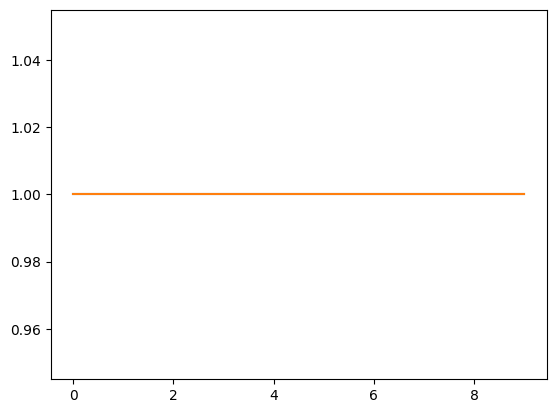

In [70]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [71]:
y_log = model.predict(x_test_pca)

625/625 [==============================] - 1s 2ms/step


In [74]:
y_pred_dl = np.where(y_log>0.5,1,0)

In [75]:
accuracy_score(y_pred_dl,y_test)

1.0

## Last But Not The Least Deployment of the model


In [89]:
import pickle
file = open('random_f.pkl','wb')
pickle.dump(rf,file)  # Is the RandomForestClassifier file

## The Above code is a point to point details How a Machine Learning Model works from preprocessing to model deployment...